In [1]:
inputs = [1,2,3,2.5]
weights = [
    [.2, .8, -.5, 1],
    [.5, -.91, .26, -.5],
    [-.26, -.27, .17, .87]]

biases = [2,3,.5]
inputs, weights, biases


([1, 2, 3, 2.5],
 [[0.2, 0.8, -0.5, 1], [0.5, -0.91, 0.26, -0.5], [-0.26, -0.27, 0.17, 0.87]],
 [2, 3, 0.5])

In [2]:
l=zip(weights, biases)
l

In [3]:
a = [1,2,3]
b = [2,3,4]
dotp = a[0]*b[0] + a[1]*b[1] + a[2]*b[2]
dotp

20

### A single neuron with NumPy

In [4]:
import numpy as np

inputs = [1.0 , 2.0 ,3.0 ,2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias = 2.0

np.dot(weights, inputs)+ bias

4.8

### A layer of neurons with NumPy

In [5]:
inputs = [1,2,3,2.5]
weights = [
    [.2, .8, -.5, 1],
    [.5, -.91, .26, -.5],
    [-.26, -.27, .17, .87]]

biases = [2,3,.5]

layer_outputs = np.dot(weights, inputs) + biases
layer_outputs

array([4.8  , 1.21 , 2.385])

### A Batch of Data

In [6]:
inputs = [[1,2,3,2.5], [2,5,-1,2],[-1.5,2.7,3.3, -0.8]]
inputs

[[1, 2, 3, 2.5], [2, 5, -1, 2], [-1.5, 2.7, 3.3, -0.8]]

### Matrix Product and transposition

In [7]:
a = np.array([[1,2,3]])
b = [2,3,4]
b = np.array([b]).T
np.dot(a,b)

array([[20]])

### A Layer of Neurons & Batch of Data with NumPy

In [8]:
inputs = [[1,2,3,2.5], [2,5,-1,2],[-1.5,2.7,3.3, -0.8]]
weights = [
    [.2, .8, -.5, 1],
    [.5, -.91, .26, -.5],
    [-.26, -.27, .17, .87]]
inputs = np.array(inputs)
weights = np.array(weights)

In [9]:
np.dot(inputs, weights.T)

array([[ 2.8  , -1.79 ,  1.885],
       [ 6.9  , -4.81 , -0.3  ],
       [-0.59 , -1.949, -0.474]])

In [10]:
biases = np.array([2,3,.5])
np.dot(inputs, weights.T) + biases

array([[ 4.8  ,  1.21 ,  2.385],
       [ 8.9  , -1.81 ,  0.2  ],
       [ 1.41 ,  1.051,  0.026]])

## Chapter 3. Adding Layers

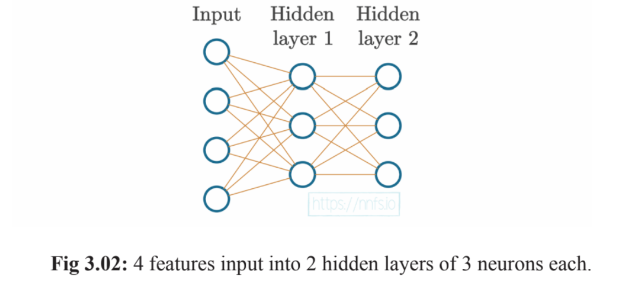

In [11]:
from IPython.display import Image
Image(filename=r".\img\Fig 3.02 2 layers x 3 neurons.png")

In [12]:
inputs = [[1,2,3,2.5], [2,5,-1,2],[-1.5,2.7,3.3, -0.8]]   # 3 input samples, with 4 inputs each

# Layer 1
weights = [
    [.2, .8, -.5, 1],           # Neuron 1, with 4 inputs
    [.5, -.91, .26, -.5],       # Neuron 2, with 4 inputs
    [-.26, -.27, .17, .87]]     # Neuron 3, with 4 inputs
biases = [2,3,.5]

In [13]:
# Layer 2
weights2 = [
    [.1, -.14, .5],
    [-.5, .12, -.33],
    [-.44, .73, -.13]]
biases2 = [-1, 2, -0.5]

In [14]:
layer1_outputs = np.dot(inputs, np.array(weights).T)+biases
layer2_outputs = np.dot(layer1_outputs, np.array(weights2).T) + biases2
print(layer2_outputs)

[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


## Import dataset from NNFS

In [15]:
from nnfs.datasets import spiral_data
import numpy as np
import nnfs
nnfs.init()

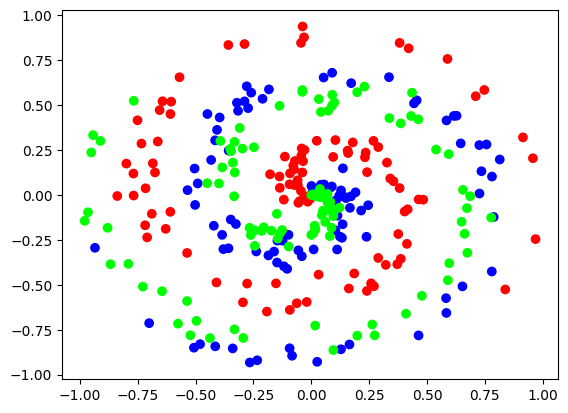

In [16]:
import matplotlib.pyplot as plt

X,y = spiral_data(samples=100, classes=3)
plt.scatter(X[:,0], X[:,1], c=y, cmap='brg')
plt.show()

In [17]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        # initializing weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases  = np.zeros((1, n_neurons))
    
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

In [18]:
0.01*np.random.randn(4,3)

array([[-0.01306527,  0.01658131, -0.00118164],
       [-0.00680178,  0.00666383, -0.0046072 ],
       [-0.01334258, -0.01346717,  0.00693773],
       [-0.00159573, -0.00133702,  0.01077744]], dtype=float32)

In [19]:
np.zeros((1,4))

array([[0., 0., 0., 0.]], dtype=float32)

In [20]:
dense1 = Layer_Dense(2,3)
dense1.forward(X)

In [21]:
dense1.output[:5]

array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-2.4652982e-05, -2.5955980e-05, -3.9204173e-05],
       [-1.3046230e-04, -1.0068145e-04, -9.4224066e-05],
       [-3.3356683e-04, -2.2089493e-04, -1.2812793e-04],
       [-4.3418157e-04, -2.9118123e-04, -1.7806736e-04]], dtype=float32)

## Chapter 4: Activation Functions

ReLU Activation Function Code

In [22]:
inputs = [0,2,-1,3.3,-2.7,1.1,2.2,-100]

output = np.maximum(0, inputs)

print(output)

[0.  2.  0.  3.3 0.  1.1 2.2 0. ]


In [23]:
# ReLU Activation
class Activation_ReLU: 
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

In [24]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)

# Create ReLU activation (to be used with Dense layer)
activation1 = Activation_ReLU()

# Make a forward pass of our training data through this layer
dense1.forward(X)

# Forward pass through activation func.
# Takes in output from previos layer
activation1.forward(dense1.output)

activation1.output[:10]


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 3.0946774e-06, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.3543649e-04, 0.0000000e+00, 3.6163940e-05],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [2.4584390e-04, 0.0000000e+00, 6.8289817e-05],
       [4.6222800e-04, 0.0000000e+00, 1.8210195e-04],
       [1.2003185e-03, 0.0000000e+00, 6.7283172e-04]], dtype=float32)

## The Softmax activation function


$$
\begin{align}
Softmax Function: S_{i,j} = \frac{e^{z_{i,j}}}{\sum \limits _{l=1} ^{L} e^{z_{i,l}}}
\end{align}
$$

In [25]:
import math

layer_outputs = [4.8, 1.21, 2.385]

exp_values = []

for output in layer_outputs:
    exp_values.append(math.e ** output)

print('Exponential values:')
print(exp_values)

Exponential values:
[121.51041751873483, 3.353484652549023, 10.859062664920513]


In [26]:
norm_base = sum(exp_values)
norm_values = []
for value in exp_values:
    norm_values.append( value / norm_base)

print('Normalized exponential values:')
print(norm_values)

Normalized exponential values:
[0.8952826639572619, 0.024708306782099374, 0.0800090292606387]


Now, do the same set of operations with the use of NumPy instead:

In [27]:
import numpy as np

layer_outputs = [4.8, 1.21, 2.385]

# For each value in a vector, calculate the exponential value
exp_values = np.exp(layer_outputs)
print('Exponentiated values:')
print(exp_values)

# Now normalization values
norm_values = exp_values / np.sum(exp_values)
print('normalized exponentiated values:')
print(norm_values)
print('sum of normalized values: ', np.sum(norm_values))


Exponentiated values:
[121.51041752   3.35348465  10.85906266]
normalized exponentiated values:
[0.89528266 0.02470831 0.08000903]
sum of normalized values:  0.9999999999999999


To train in batches, we need to convert this functionality to accept layer outputs in batches:

In [28]:
# Get unmormalized probabilities
exp_values = np.exp(layer1_outputs)

probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
probabilities

array([[8.95282664e-01, 2.47083068e-02, 8.00090293e-02],
       [9.99811129e-01, 2.23163963e-05, 1.66554348e-04],
       [5.13097164e-01, 3.58333899e-01, 1.28568936e-01]])

In [29]:
class Activation_Softmax:

    # Forward pass
    def forward(self, inputs):
        # Get unnormalized probabilities (Prevent big positive to 'explode')
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))

        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)

        self.output = probabilities


In [30]:
Activation_Softmax()

In [31]:
softmax = Activation_Softmax()
softmax.forward([[1, 2, 3]])
print(softmax.output)

[[0.09003057 0.24472847 0.66524096]]


In [32]:
softmax.forward([[-2, -1,0]])
print(softmax.output)

[[0.09003057 0.24472847 0.66524096]]


In [33]:
# Completing our neural network: 

X, y = spiral_data(samples=100, classes=3)

# Create a Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2,3)

# Create ReLU activation, to be used with Dense layer:
activation1 = Activation_ReLU()

# Create second Dense layer with 3 input features (as we take output
# of previous layer here), and 3 output values
dense2 = Layer_Dense(3,3)

# Create Softmax activation, to be used with Dense layer:
activation2 = Activation_Softmax()

# Make a forward pass of our training data trough the layers: 
dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)

print(activation2.output[:5])

[[0.33333334 0.33333334 0.33333334]
 [0.33333287 0.33333415 0.333333  ]
 [0.3333321  0.33333525 0.33333266]
 [0.33333173 0.3333352  0.33333305]
 [0.3333308  0.33333713 0.33333206]]


## Chapter 5
Calculating Network Error with Loss

Formula for calculating the **Categorical Cross-Entropy**:
$$
L_{i} = -\sum \limits _{j} y_{i,j}log(\hat y_{i,j})
$$
where $L_{i}$ denotes sample loss value, *i* is the i-th sample in the set, *j* is the label/output index, *y* denotes the target values, and $\hat y$ denotes the predicted values.

In [34]:
import math

# An example output from the output layer of the neural network
softmax_output = [0.7, 0.1, 0.2]

# Ground truth
target_output  = [1,0,0]

loss = -(math.log(softmax_output[0])*target_output[0] +
         math.log(softmax_output[1])*target_output[1] +
         math.log(softmax_output[2])*target_output[2])

print(f"{loss:.6f}")

0.356675


In [35]:
# ==> equals (since target output as '1' and two '0')
loss = -math.log(softmax_output[0])
print(f"{loss:.6f}")

0.356675


In [36]:
softmax_output = np.array(
    [[0.7, 0.1, 0.2],
    [0.1, 0.5, 0.4],
    [0.02, 0.9, 0.08]])
class_target = [0,1,1]   # For example 'dog', 'cat', 'cat'

In [37]:
for targ_idx, distribution in zip(class_target, softmax_output):
    print(targ_idx, distribution, "-->", distribution[targ_idx])

0 [0.7 0.1 0.2] --> 0.7
1 [0.1 0.5 0.4] --> 0.5
1 [0.02 0.9  0.08] --> 0.9


In [38]:
# This replaces above using numpy array
print(softmax_output[[0,1,2], [0,1,1]])

[0.7 0.5 0.9]


In [39]:
# And with unknown length use len to get range to get each item
print(softmax_output[range(len(softmax_output)), class_target])

[0.7 0.5 0.9]


In [40]:
# Apply the negative log to this list
print(-np.log(softmax_output[range(len(softmax_output)), class_target]))

[0.35667494 0.69314718 0.10536052]


In [41]:
# And apply NumPy average. We want to calculate average loss per batch

neg_log = -np.log(softmax_output[range(len(softmax_output)), class_target])
average_loss = np.mean(neg_log)
print(average_loss)

0.38506088005216804


In [42]:
neg_log

array([0.35667494, 0.69314718, 0.10536052])

In [43]:
import numpy as np

softmax_outputs = np.array(
    [[0.7, 0.1, 0.2],
    [0.1, 0.5, 0.4],
    [0.02, 0.9, 0.08]])

class_targets = np.array([[1,0,0],
                         [0,1,0],
                        [0,1,0]])

# Probabilities for target values - only if categorical labels
if len(class_targets.shape) == 1:
    correct_confidences = softmax_outputs[
        range(len(softmax_outputs)), class_targets]
elif len(class_targets.shape) == 2:
    correct_confidences = np.sum(
        softmax_outputs * class_targets, axis=1)

# Losses
neg_log = -np.log(correct_confidences)

average_loss = np.mean(neg_log)
print(average_loss)

0.38506088005216804


## The Categorical Cross-Entropy Loss Class

In [44]:
# Common loss class
class Loss:

    # Calculates the data and the regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):

        # Calculate loss samples
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Return loss
        return data_loss

In [45]:
# Cross-Entropy loss
class Loss_CategoricalCrossEntropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Number of samples in the batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)

        # Probabilities for target values - only if categorical values 
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples), y_true]    

        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )
        
        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

In [46]:

loss_function = Loss_CategoricalCrossEntropy()
loss = loss_function.calculate(softmax_outputs, class_targets)
print(loss)

0.38506088005216804


## Accuracy Calculation

In [47]:
import numpy as np

# Probabilities of 3 samples
softmax_outputs = np.array([
    [0.7, 0.2, 0.1],
    [0.5, 0.1, 0.4],
    [0.02, 0.9, 0.08]
])

# Target (ground-truth) labels for 3 samples
class_targets = np.array([0,1,1])

# Calculate values along the second axis (axis of index 1)
predictions = np.argmax(softmax_outputs, axis=1)

# If targets are one-hot encoded - convert them
if len(class_targets.shape) == 2: 
    class_targets = np.argmax(class_targets, axis=1)
    print("class_targets", class_targets)

# True evaluates to 1; False to 0
accuracy = np.mean(predictions==class_targets)

print('predictions  = ',predictions)
print('class_target = ', class_targets)

print("acc:", accuracy)

predictions  =  [0 0 1]
class_target =  [0 1 1]
acc: 0.6666666666666666


# Chapter 6: Introducing Optimization

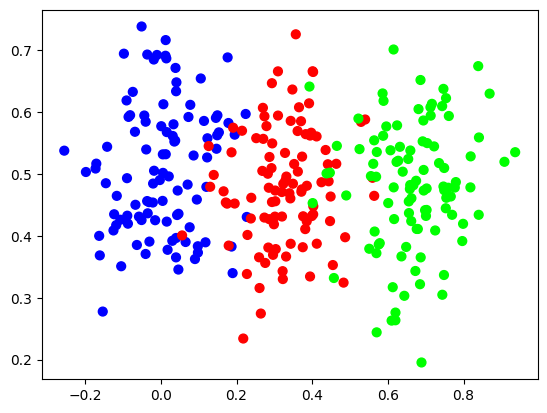

In [48]:
import matplotlib.pyplot as plt

import nnfs
from nnfs.datasets import vertical_data

nnfs.init()

X, y = vertical_data(samples=100, classes=3)

plt.scatter(X[:,0], X[:, 1], c=y, s=40, cmap='brg')
plt.show()

In [49]:
# Create model
dense1        = Layer_Dense(2,3)
activation1   = Activation_ReLU()
dense2        = Layer_Dense(3,3)
activation2   = Activation_Softmax()
loss_function = Loss_CategoricalCrossEntropy() 

In [50]:
# Create some variables to track best loff and the associated weights and biases
lowest_loss = 999
best_dense1_weights = dense1.weights.copy()
best_dense1_biases  = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases  = dense2.biases.copy()

In [51]:
for iteration in range(1000):

    # generate a new set of weights for iteration
    dense1.weights = 0.05 * np.random.randn(2,3)
    dense1.biases  = 0.05 * np.random.randn(1,3)
    dense2.weights = 0.05 * np.random.randn(3,3)
    dense2.biases  = 0.05 * np.random.randn(1,3)

    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    loss = loss_function.calculate(activation2.output, y)

    # Calculate accuracy
    predictions = np.argmax(activation2.output, axis=1)
    accuracy    = np.mean(predictions == y)

    if loss < lowest_loss:
        print('New set of weights found, iteration', iteration,
        'loss:', loss, 'acc:', accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases  = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases  = dense2.biases.copy()
        lowest_loss = loss

New set of weights found, iteration 0 loss: 1.0986564 acc: 0.3333333333333333
New set of weights found, iteration 3 loss: 1.098138 acc: 0.3333333333333333
New set of weights found, iteration 117 loss: 1.0980115 acc: 0.3333333333333333
New set of weights found, iteration 124 loss: 1.0977516 acc: 0.6
New set of weights found, iteration 165 loss: 1.0975711 acc: 0.3333333333333333
New set of weights found, iteration 552 loss: 1.0974693 acc: 0.34
New set of weights found, iteration 778 loss: 1.0968257 acc: 0.3333333333333333


### Try the above again but will small adjustment 

In [52]:
for iteration in range(1000):

    # generate a new set of weights for iteration
    dense1.weights += 0.05 * np.random.randn(2,3)
    dense1.biases  += 0.05 * np.random.randn(1,3)
    dense2.weights += 0.05 * np.random.randn(3,3)
    dense2.biases  += 0.05 * np.random.randn(1,3)

    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    loss = loss_function.calculate(activation2.output, y)

    # Calculate accuracy
    predictions = np.argmax(activation2.output, axis=1)
    accuracy    = np.mean(predictions == y)

    if loss < lowest_loss:
        print('New set of weights found, iteration', iteration,
        'loss:', loss, 'acc:', accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases  = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases  = dense2.biases.copy()
        lowest_loss = loss
    else:
        dense1.weights = best_dense1_weights.copy()
        dense1.biases  = best_dense1_biases.copy()
        dense2.weights = best_dense2_weights.copy()
        dense2.biases  = best_dense2_biases.copy()
        

New set of weights found, iteration 4 loss: 1.0950155 acc: 0.4066666666666667
New set of weights found, iteration 8 loss: 1.0923811 acc: 0.3333333333333333
New set of weights found, iteration 14 loss: 1.0921516 acc: 0.3333333333333333
New set of weights found, iteration 27 loss: 1.0910002 acc: 0.45666666666666667
New set of weights found, iteration 29 loss: 1.090223 acc: 0.3333333333333333
New set of weights found, iteration 33 loss: 1.0870198 acc: 0.3333333333333333
New set of weights found, iteration 36 loss: 1.0830225 acc: 0.3333333333333333
New set of weights found, iteration 44 loss: 1.0762987 acc: 0.44
New set of weights found, iteration 45 loss: 1.0752491 acc: 0.3333333333333333
New set of weights found, iteration 50 loss: 1.0667853 acc: 0.63
New set of weights found, iteration 52 loss: 1.0621986 acc: 0.4
New set of weights found, iteration 53 loss: 1.054426 acc: 0.49
New set of weights found, iteration 59 loss: 1.0523733 acc: 0.4033333333333333
New set of weights found, iterati

Let's try with the previous spiral dataset

In [53]:
X,y = spiral_data(samples=100,classes=3)
